In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv


In [33]:
df= pd.read_csv("/kaggle/input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv")

In [34]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

<Axes: >

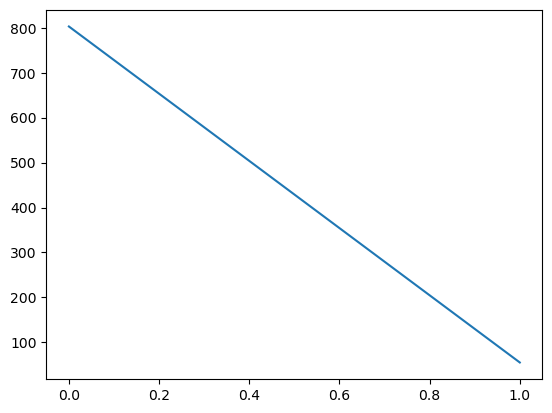

In [36]:
import matplotlib.pyplot as plt
df['Biopsy'].value_counts().plot()

<Axes: >

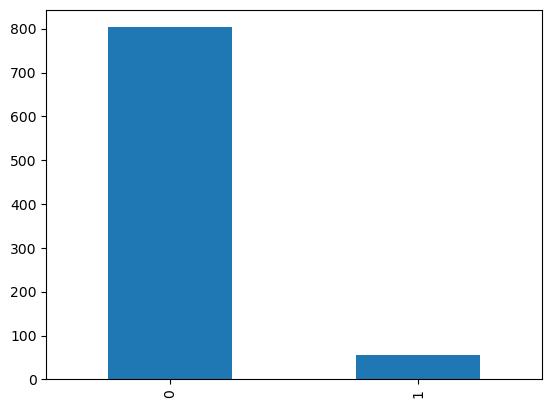

In [37]:
df['Biopsy'].value_counts().plot(kind='bar')

In [38]:
df.replace('?', np.nan, inplace=True)

In [39]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [40]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [41]:
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis=1, inplace= True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [43]:
for name,value in df.items():
    try:
        df[name] = df[name].fillna(df[name].mean())
    except TypeError:
         df[name] = df[name].fillna(df[name].mode()[0])

In [44]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [45]:
y = df['Biopsy']
x = df.drop('Biopsy', axis=1)

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_new, y_new = smote.fit_resample(x,y)

<Axes: >

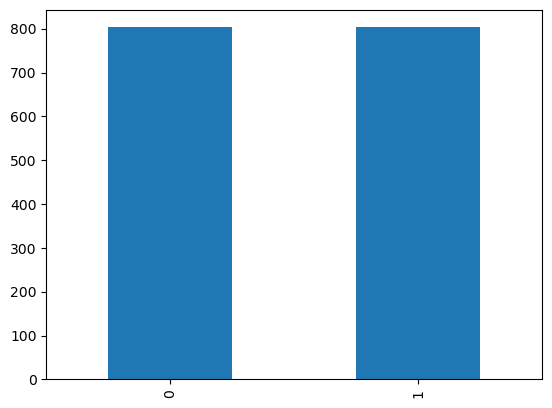

In [47]:
y_new.value_counts().plot(kind='bar')

In [48]:
x_new

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,30,2.0,17.0,1.817431,0.0,0.0,0.0,1.0,9.0,0.408716,...,0.0,0.0,0,0,0,0,0,0,1,0
1602,21,2.941331,15.0,1.117338,0.0,0.0,0.0,1.0,0.975359,0.0,...,0.0,0.0,0,0,0,0,0,1,1,0
1603,24,1.962112,18.0,3.962112,0.0,0.0,0.0,0.037888,0.018944,0.0,...,0.0,0.0,0,0,0,0,0,1,1,0
1604,21,1.0,17.0,1.475507,0.0,0.0,0.0,1.0,3.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state = 5)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier                           
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, precision_recall_curve

In [51]:
#RANDOM-FOREST-REGRESSOR

regressor= RandomForestClassifier()
regressor.fit(x_train, y_train)
y_pred= regressor.predict(x_test)

In [52]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.968944099378882
Precision:  0.9640718562874252
Recall:  0.9757575757575757
F1 score:  0.9698795180722892
Confusion Matrix: 
 [[151   6]
 [  4 161]]


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

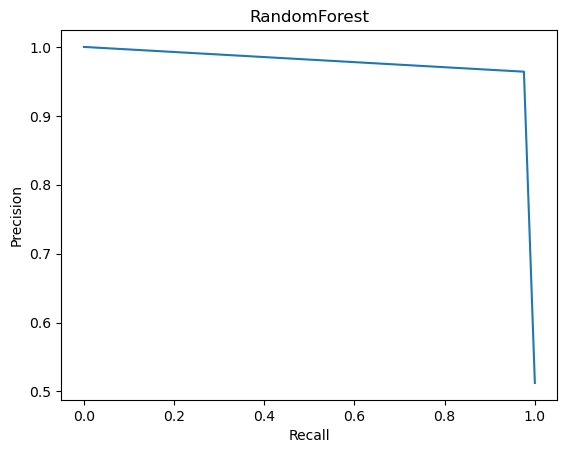

In [53]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RandomForest')
plt

In [54]:
#LOGISTIC-REGRESSOR

regressor_2= LogisticRegression()
regressor_2.fit(x_train, y_train)
y_pred_2= regressor_2.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print("Accuracy: ", accuracy_score(y_test, y_pred_2))
print("Precision: ", precision_score(y_test, y_pred_2))
print("Recall: ", recall_score(y_test, y_pred_2))
print("F1 score: ", f1_score(y_test, y_pred_2))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_2))

Accuracy:  0.8757763975155279
Precision:  0.9496402877697842
Recall:  0.8
F1 score:  0.8684210526315789
Confusion Matrix: 
 [[150   7]
 [ 33 132]]


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

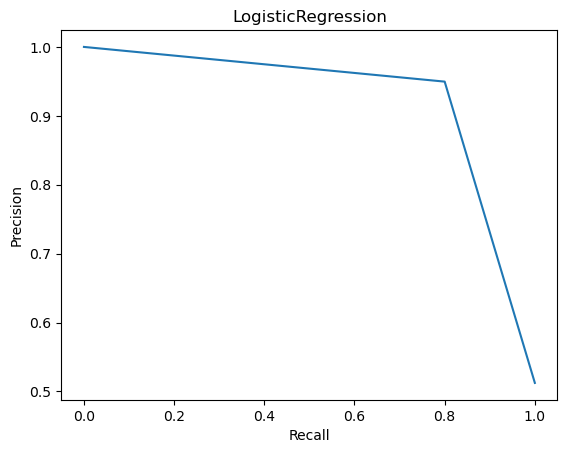

In [56]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_2)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LogisticRegression')
plt

In [57]:
#DECISION-TREE

regressor_3= DecisionTreeClassifier()
regressor_3.fit(x_train, y_train)
y_pred_3= regressor_3.predict(x_test)

In [58]:
print("Accuracy: ", accuracy_score(y_test, y_pred_3))
print("Precision: ", precision_score(y_test, y_pred_3))
print("Recall: ", recall_score(y_test, y_pred_3))
print("F1 score: ", f1_score(y_test, y_pred_3))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_3))

Accuracy:  0.9627329192546584
Precision:  0.9580838323353293
Recall:  0.9696969696969697
F1 score:  0.963855421686747
Confusion Matrix: 
 [[150   7]
 [  5 160]]


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

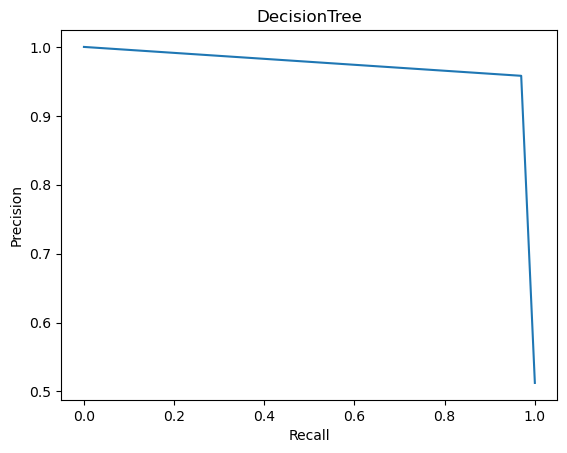

In [59]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_3)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('DecisionTree')
plt

In [60]:
print("""ANALYSIS:
RANDOM FOREST MODEL IS BEST USED FOR PREDICTING WHETHER A PERSON HAS CERVICAL CANCER OR NOT SINCE:
ACCURACY, PRECISION, F1SCORE AND RECALL ARE THE HIGHEST FOR RANDOM-FOREST-CLASSIFIER AMONG THE 3 MODELS TESTED ABOVE
ALSO, THE PR-CURVES ALSO INDICATE RANDOM FOREST IS BEST MODEL (MORE TOWARDS RIGHT-PART AND IT CAN BE CLEARLY  SEEN THAT RANDOM FOREST'S CURVE HAS HIGHEST AREA UNDER IT SO IT'S BEST)""")


ANALYSIS:
RANDOM FOREST MODEL IS BEST USED FOR PREDICTING WHETHER A PERSON HAS CERVICAL CANCER OR NOT SINCE:
ACCURACY, PRECISION, F1SCORE AND RECALL ARE THE HIGHEST FOR RANDOM-FOREST-CLASSIFIER AMONG THE 3 MODELS TESTED ABOVE
ALSO, THE PR-CURVES ALSO INDICATE RANDOM FOREST IS BEST MODEL (MORE TOWARDS RIGHT-PART AND IT CAN BE CLEARLY  SEEN THAT RANDOM FOREST'S CURVE HAS HIGHEST AREA UNDER IT SO IT'S BEST)
